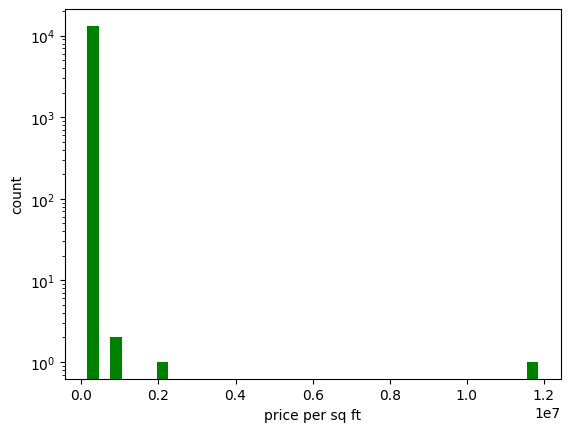

In [7]:
import pandas as pd
import matplotlib.pyplot as plt


data = pd.read_csv('C:\\Users\\Ahmar Hussain\\Downloads\\bhp.csv')
plt.hist(data.price_per_sqft, bins = 20, rwidth = 0.5, color = 'green')
plt.xlabel('price per sq ft')
plt.ylabel('count')
plt.yscale('log')
plt.show()



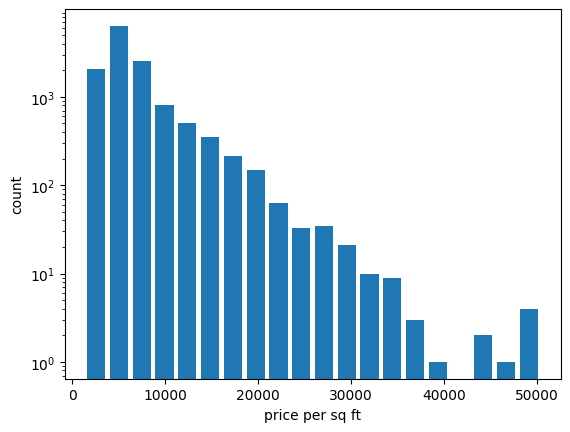

In [7]:
#using percentile to remove outliers

upper_limit = data.price_per_sqft.quantile(0.001)
lower_limit = data.price_per_sqft.quantile(0.999)


new_data = data[(data['price_per_sqft'] > upper_limit) & (data['price_per_sqft'] < lower_limit)]
#plot

plt.hist(new_data.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('price per sq ft')
plt.ylabel('count')
plt.yscale('log')
plt.show()



In [2]:
#using 4 standard deviations to remove outliers

upper_limit = new_data['price_per_sqft'].mean() + 4 * new_data['price_per_sqft'].std()
lower_limit = new_data['price_per_sqft'].mean() - 4 * new_data['price_per_sqft'].std()

new_data = new_data[(new_data['price_per_sqft'] < upper_limit) & (new_data['price_per_sqft'] > lower_limit)]

plt.hist(new_data.price_per_sqft, bins = 20, rwidth = 0.8)
plt.xlabel('price per sq ft')
plt.ylabel('count')
#plt.yscale('log')
plt.show()

NameError: name 'new_data' is not defined

In [1]:
1+2

3

In [10]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-3,3)
y = [-i**2 for i in x]

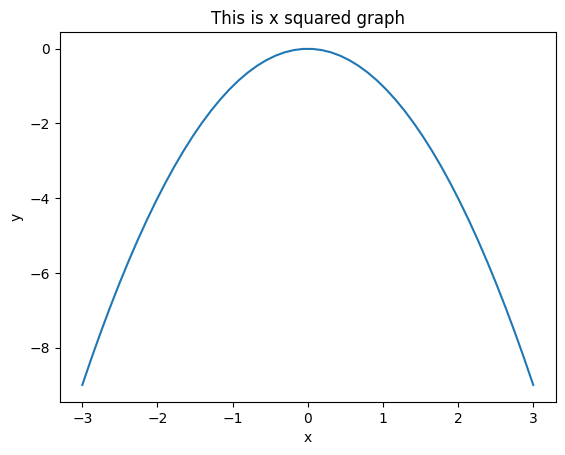

In [11]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('This is x squared graph')
plt.show()

In [14]:
import pandas as pd


data = pd.read_csv('revenue.csv')
data

,company,revenue
0,Tesla,31.0
1,Uber,11.0
2,Amazon,386.0
3,Jinndal Steel,4.7
4,Axis Bank,5.6
5,Vedanta,11.3


<Axes: xlabel='company'>

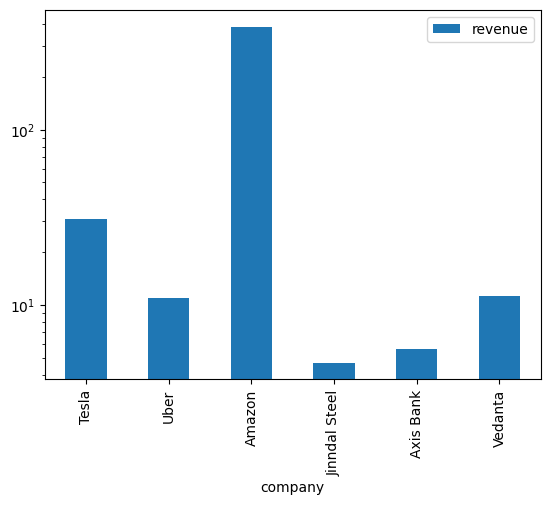

In [25]:
data.plot(x = 'company', y = 'revenue', kind='bar', logy = True)

In [28]:
data = pd.read_csv('C:\\Users\\Ahmar Hussain\\Downloads\\movie_revenues.csv')
data.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",12/10/2009,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,54000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.youmeanddupree.com/,1819,"[{""id"": 1253, ""name"": ""roommate""}, {""id"": 2038...",en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",7/14/2006,130431368,108,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Two's company. Dupree's a crowd.,"You, Me and Dupree",5.4,407


In [31]:
data['revenue'].describe()

count    4.600000e+01
mean     1.879289e+08
std      4.551144e+08
min      8.522060e+05
25%      2.866957e+07
50%      8.381714e+07
75%      1.382135e+08
max      2.787965e+09
Name: revenue, dtype: float64

In [33]:
data['revenue_mln'] = data['revenue'].apply(lambda x:x/1000000)
data['revenue_mln'].describe()

count      46.000000
mean      187.928898
std       455.114423
min         0.852206
25%        28.669569
50%        83.817142
75%       138.213502
max      2787.965087
Name: revenue_mln, dtype: float64

In [34]:
_, mean, std, *_ = data['revenue_mln'].describe()
mean, std

(187.92889841304347, 455.1144234195408)

In [36]:
def get_zscore(value, mean, std):
    return (value - mean)/std

In [37]:
data['z_score'] = data['revenue_mln'].apply(lambda x: get_zscore(x, mean, std))
data.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,revenue_mln,z_score
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2787.965087,5.712929
1,54000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.youmeanddupree.com/,1819,"[{""id"": 1253, ""name"": ""roommate""}, {""id"": 2038...",en,"You, Me and Dupree",After standing in as best man for his longtime...,18.600367,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...",...,130431368,108,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Two's company. Dupree's a crowd.,"You, Me and Dupree",5.4,407,130.431368,-0.126336
